In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
# We use the built-in loader for the Breast Cancer dataset
data = load_breast_cancer()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant, 1 = Benign

# View first 5 rows to understand the data structure
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst 

In [ ]:
# 2. Data Preprocessing

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())
# Note: If there were missing values, we would fill them using: df.fillna(df.mean(), inplace=True)

# Split into Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into Training (80%) and Testing (20%) sets
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Missing Values Count:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Training Shape: (455, 30)
Testing Shape: (114, 30)


In [ ]:
# 3. Model Implementation
# Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

GaussianNB()


Accuracy: 97.37%

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



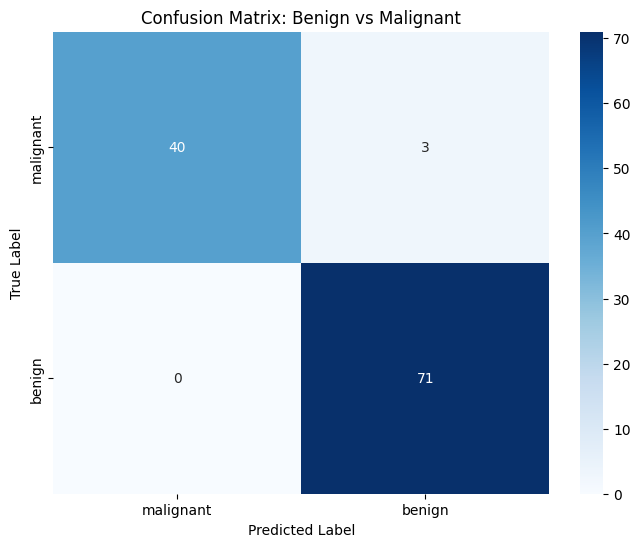

In [ ]:
# 4. Model Evaluation
y_pred = model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc * 100:.2f}%")

# Detailed Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Benign vs Malignant')
plt.show()